In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from atusfunclib import load_data, group_filter_average

In [3]:
# Import all data
data_import = load_data(loc='data')

In [4]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes, \
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes, \
dfdemocodes = data_import

In [5]:
# Convert category columns to object
df['TEAGE_CAT'] = df['TEAGE_CAT'].astype(float)
df['TRERNWA_CAT'] = df['TRERNWA_CAT'].astype(float)

In [6]:
# Get filtered, grouped and averaged data
dfedu_filtered, df_byedu, a_byedu = group_filter_average(df, 'PEEDUCA', 'TEAGE', 18, weights='TUFNWGTP')
dfage_filtered, df_byage, a_byage = group_filter_average(df, 'TEAGE_CAT', 'TEAGE', 18, weights='TUFNWGTP')
dfocc_filtered, df_byocc, a_byocc = group_filter_average(df, 'TRDTOCC1', 'TEAGE', 18, weights='TUFNWGTP')
dfinc_filtered, df_byinc, a_byinc = group_filter_average(df, 'TRERNWA_CAT', 'TEAGE', 18, weights='TUFNWGTP')

In [7]:
# Average minutes per day on a particular activity (across all groups)
a_mean_edu = dfedu_filtered.filter(like='_W').filter(like='t').sum() / dfedu_filtered.TUFNWGTP.sum()
a_mean_age = dfage_filtered.filter(like='_W').filter(like='t').sum() / dfage_filtered.TUFNWGTP.sum()
a_mean_occ = dfocc_filtered.filter(like='_W').filter(like='t').sum() / dfocc_filtered.TUFNWGTP.sum()
a_mean_inc = dfinc_filtered.filter(like='_W').filter(like='t').sum() / dfinc_filtered.TUFNWGTP.sum()

In [8]:
# Deviations of Averages by group from Average for all groups
a_byedu_deviation = a_byedu / a_mean_edu - 1.0
a_byage_deviation = a_byage / a_mean_age - 1.0
a_byocc_deviation = a_byocc / a_mean_occ - 1.0
a_byinc_deviation = a_byinc / a_mean_inc - 1.0

In [9]:
def plot_heatmap(adf, acts, acodes, xcodes, vmin=-1.0, vmax=1.0, cmap='RdBu_r',
                 save=False, size=(10, 8), plotname='fig01.svg'):
    # Transposed dataframe with selected activities and count cols
    plotdf = adf[acts].T
    no_cols = len(plotdf.keys())
    
    # Create an order ranking level from -1 to +1
    plotdf['order'] = plotdf.multiply(np.linspace(-1, 1, num=no_cols)).sum(axis='columns')
    
    # Create codes from index and merge to acodes
    plotdf['CODE'] = [c[1:-2] for c in plotdf.index.values]
    plotdf_m = plotdf.merge(acodes[['CODE', 'NAME']], on='CODE', how='left').set_index(plotdf.index)
    
    # Plot data sorted bu order
    plotdf_s = plotdf_m.sort_values('order')
    
    # Plot heatmap
    plt.figure(figsize=size)
    p = sns.heatmap(plotdf_s.iloc[:, :-3], vmin=vmin, vmax=vmax, cmap=cmap)
    
    # Set labels
    p.set_yticklabels(plotdf_s.NAME[::-1],
                      rotation=0,
                      fontsize=12)
    p.set_xticklabels(xcodes.NAME.values,
                      rotation=45,
                      ha='right',
                      fontsize=12)
    p.set(xlabel='')
    
    # Save to svg if required
    if save:
        plt.savefig(plotname, bbox_inches='tight')

    return

In [10]:
# Activities that we are intersted in plotting
positiveWL = ['010101', '0102', '0103', '050201',
              '050203', '1101', '1201', '1202',
              '1203', '1204', '1301', '1302', '14']

negoccWL = ['05', '0501', '0504', '1805']

neghomeWL = ['0201', '0202', '0203', '0204', '0209',
             '0301', '0302', '0303', '0304', '0305',
             '0802', '0803']

activities = positiveWL + negoccWL + neghomeWL

activities_c = ['t'+ a + '_W' for a in activities]

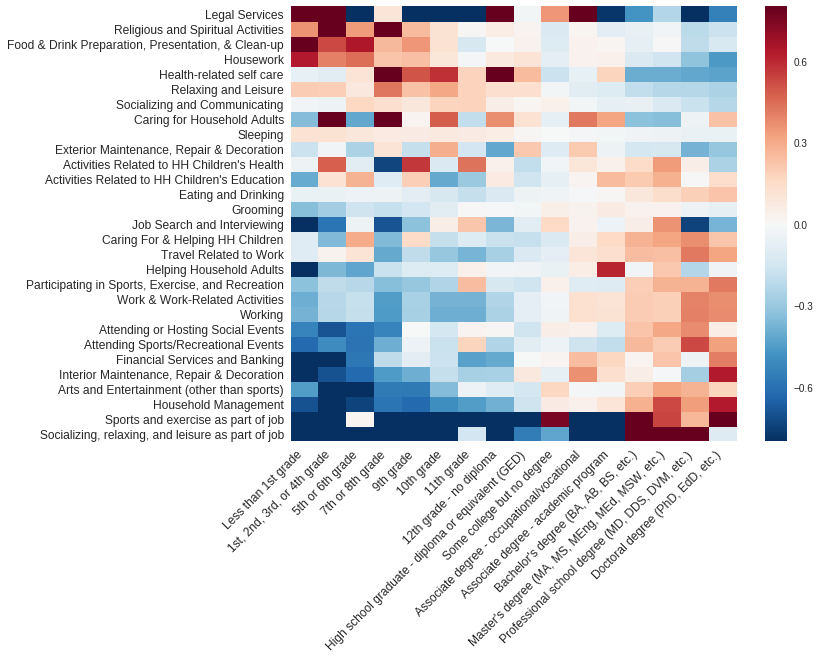

In [11]:
plot_heatmap(a_byedu_deviation, activities_c,
             dfactcodes, dfeducodes,
             vmin=-0.8, vmax=0.8, cmap='RdBu_r', save=False)

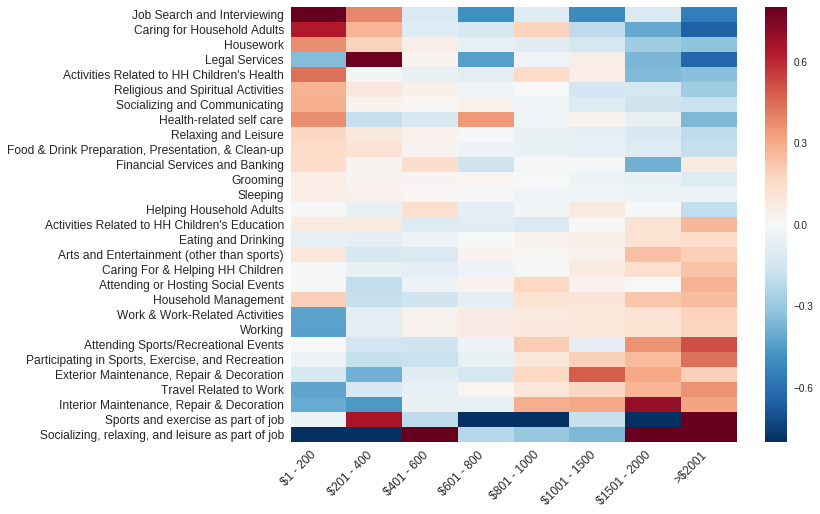

In [12]:
plot_heatmap(a_byinc_deviation, activities_c,
             dfactcodes, dfinccodes,
             vmin=-0.8, vmax=0.8, cmap='RdBu_r', save=False)

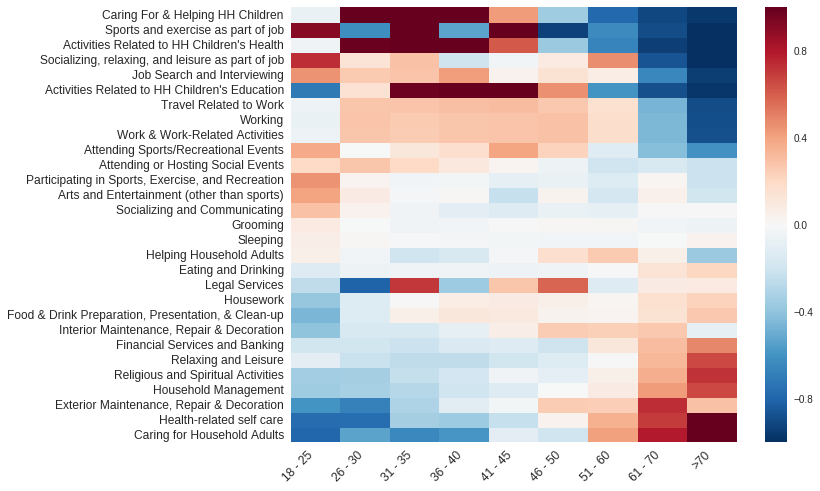

In [13]:
plot_heatmap(a_byage_deviation, activities_c,
             dfactcodes, dfagecodes[1:],
             vmin=-1.0, vmax=1.0, cmap='RdBu_r', save=False)

In [14]:
# Small versions of plots with limited rows
activities_short = ['010101', '0103', '05', '1805', '0201', '0301']
activities_c_short = ['t'+ a + '_W' for a in activities_short]

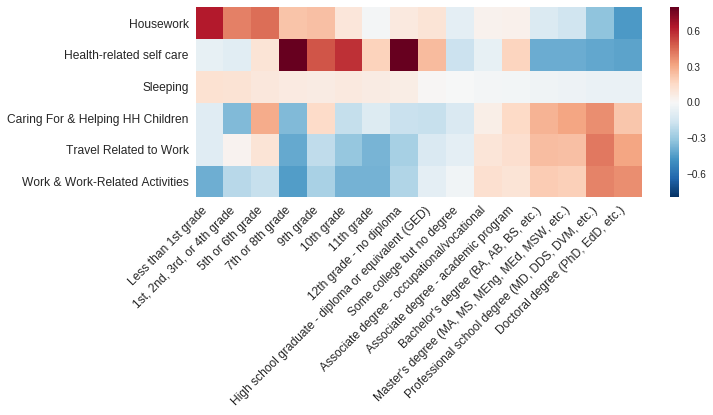

In [15]:
plot_heatmap(a_byedu_deviation, activities_c_short,
             dfactcodes, dfeducodes,
             vmin=-0.8, vmax=0.8, cmap='RdBu_r', save=False, size=(10,3.5))

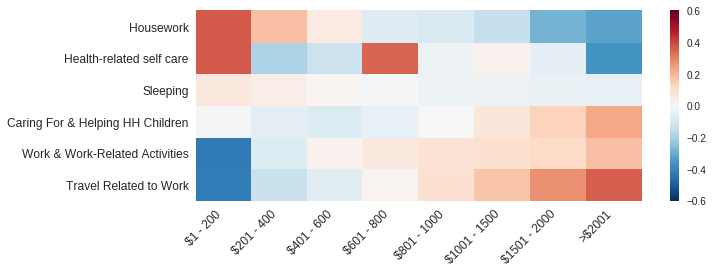

In [16]:
plot_heatmap(a_byinc_deviation, activities_c_short,
             dfactcodes, dfinccodes,
             vmin=-0.6, vmax=0.6, cmap='RdBu_r', save=False, size=(10,3.5))

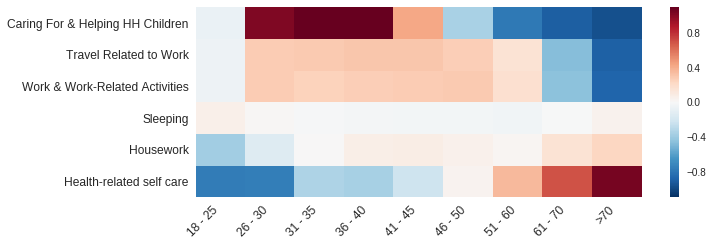

In [17]:
plot_heatmap(a_byage_deviation, activities_c_short,
             dfactcodes, dfagecodes[1:],
             vmin=-1.1, vmax=1.1, cmap='RdBu_r', save=False, size=(10,3.5))